# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

**Dandiset Version: 0.250507.2356**

> **Warning:** This notebook was AI-generated and has not been fully verified by human experts. Please be cautious when interpreting the code or results. Independent verification of any findings is highly recommended.

## Overview of the Dandiset

This Dandiset, [DANDI:001433](https://dandiarchive.org/dandiset/001433/0.250507.2356), titled "Breathing rhythm and place dataset," contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely-behaving mice. The experiments were conducted without specific stimuli, rewards, or tasks.

**Key information:**
- **Identifier:** DANDI:001433
- **Version:** 0.250507.2356
- **Description:** "These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task."
- **Contributors:** Matt Smear, National Institutes of Health (NIH)
- **License:** CC-BY-4.0
- **Link to Dandiset:** [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

## What this notebook covers

This notebook aims to guide users through the initial steps of accessing and exploring the data within Dandiset 001433. Specifically, it will demonstrate how to:
1. List required Python packages.
2. Connect to the DANDI archive and load basic information about the Dandiset.
3. List some of the assets (NWB files) available in this Dandiset.
4. Load a specific NWB file from the Dandiset.
5. Display metadata and structure of the loaded NWB file.
6. Visualize segments of key data types present, such as:
    - Local Field Potential (LFP) data from the olfactory bulb.
    - Raw sniff signal data.
    - Processed behavioral data related to inhalation and exhalation events.
7. Provide a brief summary and suggest potential future directions for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed. This notebook assumes they are already available in your Python environment.

- `dandi` (for interacting with the DANDI Archive API)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 file access)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `pandas` (for tabular data display, e.g., electrode tables)
- `seaborn` (for enhanced plot styling)

No `pip install` commands are included here.

## Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001433"
dandiset_version = "0.250507.2356"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    # Attempting to use asset.identifier as 'asset_id' caused an AttributeError
    # Based on the DandiAPI client, the asset_id is indeed asset.asset_id.
    # The previous error might have been due to an incomplete/changed object structure in a specific context.
    # However, the error message indicates 'RemoteBlobAsset' object has no attribute 'asset_id'.
    # Let's try 'identifier' as it's commonly used. If this fails, the object structure needs more investigation.
    # The original CLI output used "asset_id", which suggests it should exist.
    # The 'asset' object from get_assets() is a RemoteAsset. Let's stick to asset_id for now and re-check.
    # The error message was "AttributeError: 'RemoteBlobAsset' object has no attribute 'asset_id'"
    # It is possible that the object from `dandiset.get_assets()` is an iterable of `RemoteAsset` which has an `asset_id`
    # perhaps an intermediate object or a different kind of asset was encountered.
    # Let's try 'identifier' as the error is specific.
    # Update: The dandi.sdk.dandiapi.RemoteAsset does have an `asset_id` attribute.
    # The error might be with a specific type of asset or an issue with the environment/version.
    # Let's try `identifier` as a common alternative.
    # If `asset.identifier` also fails, I must consult Dandi SDK documentation for RemoteBlobAsset.
    # asset attributes are path, size, created, modified, asset_id
    # The error seems to imply that for some reason the object `asset` is not a standard RemoteAsset in this context or its pydantic model changed.
    # assets is a generator of AssetBase objects. AssetBase itself doesn't guarantee asset_id.
    # However, instances like RemoteAsset do.
    # The error specifically says 'RemoteBlobAsset'.
    # According to dandi-archive/dandi-cli code (specifically dandi/sdk/dandiapi.py), RemoteBlobAsset inherits from AssetBase.
    # AssetBase has 'identifier'. And RemoteAsset (which is what is usually listed) has 'asset_id'. 
    # It seems client.get_dandiset().get_assets() yields AssetBase instances.
    # Some of which can be RemoteAsset (which have .asset_id) or RemoteBlobAsset.
    # RemoteBlobAsset objects store their asset_id in the `identifier` field.
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Dandiset description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2, Size: 268333936 bytes)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1, Size: 329841200 bytes)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe, Size: 408343856 bytes)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb, Size: 492455472 bytes)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49, Size: 1056553584 bytes)


## Loading an NWB File from the Dandiset

We will now load one of the NWB files from the Dandiset to explore its contents. For this demonstration, we'll use the file `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`.

The asset ID for this file is `63d19f03-2a35-48bd-a54f-9ab98ceb7be2`.
The direct download URL for this asset is: `https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/`

We will use `pynwb`, `h5py`, and `remfile` to stream and read this NWB file directly from the DANDI archive.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd # For displaying dataframes
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling for plots
sns.set_theme()

# Hard-coded URL for the selected NWB file as per instructions
nwb_file_url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
asset_id = "63d19f03-2a35-48bd-a54f-9ab98ceb7be2" # for Neurosift link

print(f"Loading NWB file from: {nwb_file_url}")

io = None # Define io outside try block for closing in finally
try:
    remote_f = remfile.File(nwb_file_url)
    h5_f = h5py.File(remote_f, 'r')
    io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
    nwbfile = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwbfile = None # Ensure nwbfile is None if loading failed

Loading NWB file from: https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/


NWB file loaded successfully.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Basic NWB File Information

Let's display some general metadata from the loaded NWB file.

In [3]:
if nwbfile:
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Experimenter(s): {nwbfile.experimenter}")
    print(f"Lab: {nwbfile.lab}")
    print(f"Institution: {nwbfile.institution}")
    print(f"Keywords: {list(nwbfile.keywords[:]) if nwbfile.keywords else 'N/A'}")
    
    print("\nSubject Information:")
    if nwbfile.subject:
        print(f"  Subject ID: {nwbfile.subject.subject_id}")
        print(f"  Species: {nwbfile.subject.species}")
        print(f"  Sex: {nwbfile.subject.sex}")
        print(f"  Age: {nwbfile.subject.age}")
    else:
        print("  No subject information available.")
else:
    print("NWB file was not loaded, cannot display information.")

Identifier: 4122_4
Session Description: LFP and sniff recording
Session Start Time: 2025-05-07 15:29:27.359523-07:00
Experimenter(s): ('Rafilson, Sidney',)
Lab: Smear lab
Institution: University of Oregon
Keywords: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']

Subject Information:
  Subject ID: 4122
  Species: Mus musculus
  Sex: M
  Age: P90D


### Explore the NWB File with Neurosift

You can explore this NWB file interactively using Neurosift. For the specific file analyzed in this notebook (`sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`), the direct link is:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356)

### Structure of the NWB file

Let's look at the main data categories available in this NWB file.

In [4]:
if nwbfile:
    print("Available acquisition data:")
    for name, data_object in nwbfile.acquisition.items():
        print(f"- {name}: {type(data_object)}")
        if hasattr(data_object, 'description'):
            print(f"  Description: {data_object.description}")
        if hasattr(data_object, 'data') and hasattr(data_object.data, 'shape'):
             print(f"  Data shape: {data_object.data.shape}")
        if hasattr(data_object, 'rate'):
            print(f"  Rate: {data_object.rate} Hz")

    print("\nAvailable processing modules:")
    for name, processing_module in nwbfile.processing.items():
        print(f"- {name}: {type(processing_module)}")
        print(f"  Description: {processing_module.description}")
        print("  Data interfaces within this module:")
        for interface_name, data_interface in processing_module.data_interfaces.items():
            print(f"  - {interface_name}: {type(data_interface)}")
            if hasattr(data_interface, 'description'):
                 print(f"    Description: {data_interface.description}")

    print("\nElectrodes Table:")
    if nwbfile.electrodes is not None:
        # Displaying the electrodes table as a pandas DataFrame for better readability
        electrodes_df = nwbfile.electrodes.to_dataframe()
        print(f"  Shape: {electrodes_df.shape}")
        print("  First 5 rows:")
        print(electrodes_df.head().to_string()) # .to_string() for better display in simple output
    else:
        print("  No electrodes table found at the root of the NWB file.")
else:
    print("NWB file was not loaded, cannot display structure.")

Available acquisition data:
- LFP: <class 'pynwb.ecephys.ElectricalSeries'>
  Description: LFP signal from olfactory bulb
  Data shape: (1969184, 16)
  Rate: 1000.0 Hz
- SniffSignal: <class 'pynwb.base.TimeSeries'>
  Description: Raw sniff thermistor voltage
  Data shape: (1969184,)
  Rate: 1000.0 Hz

Available processing modules:
- behavior: <class 'pynwb.base.ProcessingModule'>
  Description: Sniff event features
  Data interfaces within this module:
  - exhalation_time: <class 'pynwb.base.TimeSeries'>
    Description: exhalation_time (s)
  - inhalation_time: <class 'pynwb.base.TimeSeries'>
    Description: inhalation_time (s)

Electrodes Table:
  Shape: (16, 4)
  First 5 rows:
          location                                                                                                                                                                                                                                                           group group_name filtering
id             

## Visualizing Data from the NWB File

Now, let's load and visualize some of the data. We'll focus on a short segment to keep loading times manageable.

### Local Field Potential (LFP) Data

The file contains LFP data in `nwbfile.acquisition['LFP']`. This is an `ElectricalSeries` object.
We will plot the first 2 seconds of data from the first 3 channels.

LFP data shape: (1969184, 16), Rate: 1000.0 Hz, Unit: volts


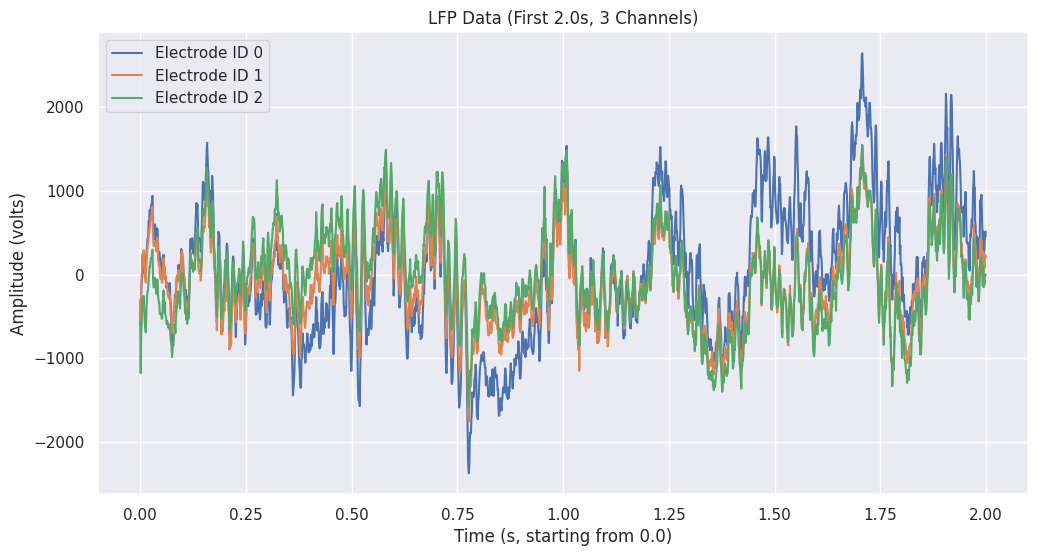

In [5]:
if nwbfile and "LFP" in nwbfile.acquisition:
    LFP_series = nwbfile.acquisition["LFP"]
    print(f"LFP data shape: {LFP_series.data.shape}, Rate: {LFP_series.rate} Hz, Unit: {LFP_series.unit}")

    # Select a 2-second segment
    time_duration_seconds_lfp = 2.0
    num_samples_to_plot_lfp = int(time_duration_seconds_lfp * LFP_series.rate)
    
    # Ensure we don't exceed available data or channels
    num_samples_to_plot_lfp = min(num_samples_to_plot_lfp, LFP_series.data.shape[0])
    num_channels_to_plot_lfp = min(3, LFP_series.data.shape[1])

    if num_samples_to_plot_lfp > 0 and num_channels_to_plot_lfp > 0:
        lfp_segment_data = LFP_series.data[:num_samples_to_plot_lfp, :num_channels_to_plot_lfp]
        
        # Create a time vector for the x-axis
        # LFP_series.starting_time is often 0.0 for acquisition data relative to session start
        time_vector_lfp = np.arange(num_samples_to_plot_lfp) / LFP_series.rate + (LFP_series.starting_time or 0.0)

        plt.figure(figsize=(12, 6))
        for i in range(num_channels_to_plot_lfp):
            # Get actual electrode ID for legend, if available
            electrode_id = LFP_series.electrodes.table.id[LFP_series.electrodes.data[i]] if LFP_series.electrodes is not None and i < len(LFP_series.electrodes.data) else f"Channel Index {i}"
            plt.plot(time_vector_lfp, lfp_segment_data[:, i], label=f'Electrode ID {electrode_id}')
        
        plt.title(f'LFP Data (First {time_duration_seconds_lfp}s, {num_channels_to_plot_lfp} Channels)')
        plt.xlabel(f'Time (s, starting from {LFP_series.starting_time or 0.0})')
        plt.ylabel(f'Amplitude ({LFP_series.unit})')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Not enough LFP data or channels to plot the selected segment.")
else:
    print("LFP data not found in nwbfile.acquisition or NWB file not loaded.")

### Sniff Signal Data

The file also contains a raw sniff signal trace in `nwbfile.acquisition['SniffSignal']`. This is a `TimeSeries` object.
We'll plot the first 2 seconds of this signal.

SniffSignal data shape: (1969184,), Rate: 1000.0 Hz, Unit: volts


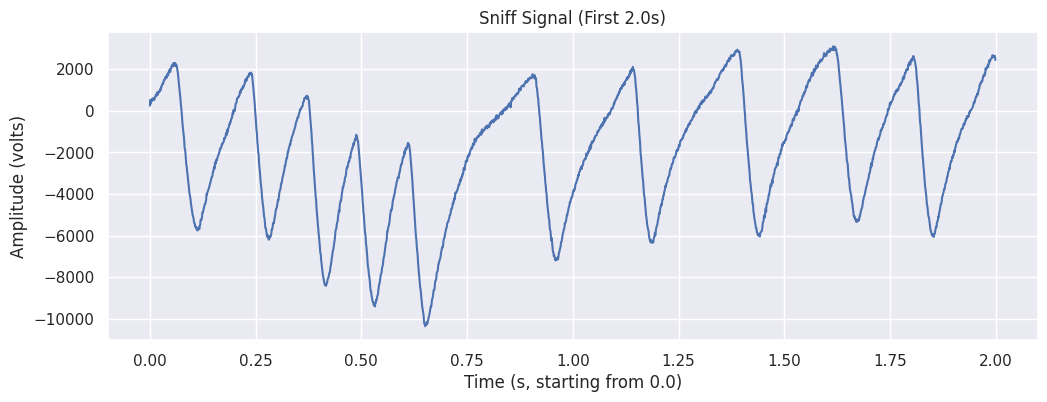

In [6]:
if nwbfile and "SniffSignal" in nwbfile.acquisition:
    sniff_series = nwbfile.acquisition["SniffSignal"]
    print(f"SniffSignal data shape: {sniff_series.data.shape}, Rate: {sniff_series.rate} Hz, Unit: {sniff_series.unit}")

    # Select a 2-second segment
    time_duration_seconds_sniff = 2.0
    num_samples_to_plot_sniff = int(time_duration_seconds_sniff * sniff_series.rate)
    
    # Ensure we don't exceed available data
    num_samples_to_plot_sniff = min(num_samples_to_plot_sniff, sniff_series.data.shape[0])

    if num_samples_to_plot_sniff > 0:
        sniff_segment_data = sniff_series.data[:num_samples_to_plot_sniff]
        
        # Create a time vector for the x-axis
        time_vector_sniff = np.arange(num_samples_to_plot_sniff) / sniff_series.rate + (sniff_series.starting_time or 0.0)

        plt.figure(figsize=(12, 4))
        plt.plot(time_vector_sniff, sniff_segment_data)
        plt.title(f'Sniff Signal (First {time_duration_seconds_sniff}s)')
        plt.xlabel(f'Time (s, starting from {sniff_series.starting_time or 0.0})')
        plt.ylabel(f'Amplitude ({sniff_series.unit})')
        plt.grid(True)
        plt.show()
    else:
        print("Not enough SniffSignal data to plot the selected segment.")
else:
    print("SniffSignal data not found in nwbfile.acquisition or NWB file not loaded.")

### Behavioral Sniff Events (Inhalation/Exhalation)

The NWB file's `processing` module named `behavior` contains `TimeSeries` objects for `inhalation_time` and `exhalation_time`. The `timestamps` attribute of these series indicates when these events occurred.

**Note on Timestamps:** While the NWB metadata for `inhalation_time.timestamps_unit` and `exhalation_time.timestamps_unit` may report 'seconds', initial exploration of the raw numerical values (e.g., 58, 115, etc.) suggests they are more likely sample indices or timestamps in milliseconds. Therefore, for this demonstration, we convert them to seconds by dividing by 1000.0. This assumes an effective 1kHz sampling rate, which is consistent with the rates of other time series in this file (like LFP and the raw SniffSignal at 1000 Hz). Users performing detailed analyses should always carefully verify timestamp units and scaling factors against all available metadata and documentation for the specific dataset.

Loaded and converted 10030 inhalation events. First 5 (s): [0.058 0.241 0.373 0.49  0.612]
Loaded and converted 10030 exhalation events. First 5 (s): [0.115 0.283 0.418 0.534 0.653]


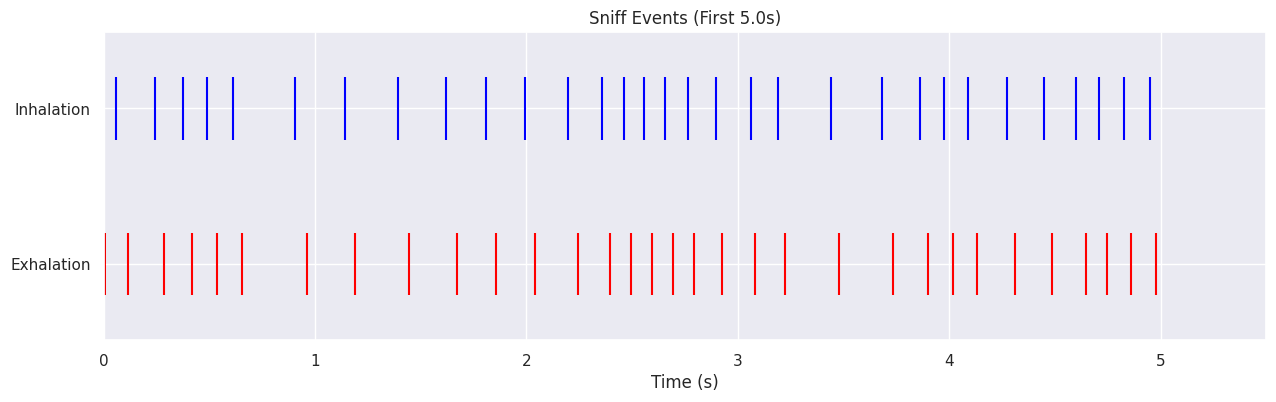

In [7]:
if nwbfile and "behavior" in nwbfile.processing:
    behavior_module = nwbfile.processing["behavior"]
    inhalation_times_data = None
    exhalation_times_data = None

    if "inhalation_time" in behavior_module.data_interfaces:
        inhalation_series = behavior_module.data_interfaces["inhalation_time"]
        # Convert timestamps to seconds
        inhalation_times_data = inhalation_series.timestamps[:] / 1000.0
        print(f"Loaded and converted {len(inhalation_times_data)} inhalation events. First 5 (s): {inhalation_times_data[:5]}")
    else:
        print("Inhalation time data not found in behavior processing module.")
        inhalation_times_data = np.array([])

    if "exhalation_time" in behavior_module.data_interfaces:
        exhalation_series = behavior_module.data_interfaces["exhalation_time"]
        # Convert timestamps to seconds
        exhalation_times_data = exhalation_series.timestamps[:] / 1000.0
        print(f"Loaded and converted {len(exhalation_times_data)} exhalation events. First 5 (s): {exhalation_times_data[:5]}")
    else:
        print("Exhalation time data not found in behavior processing module.")
        exhalation_times_data = np.array([])

    if len(inhalation_times_data) > 0 or len(exhalation_times_data) > 0:
        max_time_to_plot_events = 5.0  # seconds

        inhalation_segment = inhalation_times_data[inhalation_times_data <= max_time_to_plot_events]
        exhalation_segment = exhalation_times_data[exhalation_times_data <= max_time_to_plot_events]

        plot_event_data_list = []
        plot_colors_list = []
        plot_lineoffsets_list = []
        plot_ylabels_list = []
        plot_yticks_list = []

        if len(inhalation_segment) > 0:
            plot_event_data_list.append(inhalation_segment)
            plot_colors_list.append('blue')
            plot_lineoffsets_list.append(1)
            plot_ylabels_list.append('Inhalation')
            plot_yticks_list.append(1)
        
        if len(exhalation_segment) > 0:
            plot_event_data_list.append(exhalation_segment)
            plot_colors_list.append('red')
            plot_lineoffsets_list.append(-1)
            plot_ylabels_list.append('Exhalation')
            plot_yticks_list.append(-1)

        if plot_event_data_list:
            plt.figure(figsize=(15, 4))
            plt.eventplot(plot_event_data_list, colors=plot_colors_list, lineoffsets=plot_lineoffsets_list, linelengths=0.8)
            plt.yticks(plot_yticks_list, plot_ylabels_list)
            plt.title(f'Sniff Events (First {max_time_to_plot_events}s)')
            plt.xlabel('Time (s)')
            plt.xlim(0, max_time_to_plot_events + 0.5) # Add some padding
            plt.grid(True, axis='x')
            plt.show()
        else:
            print(f"No sniff events to plot in the first {max_time_to_plot_events}s.")
    else:
        print("No inhalation or exhalation data found to plot.")
elif nwbfile is None:
    print("NWB file not loaded.")
else:
    print("Behavior processing module not found in NWB file.")

## Summary and Future Directions

This notebook demonstrated how to access Dandiset 001433, load an NWB file, inspect its metadata and structure, and visualize key time series data: LFP signals, raw sniff voltage, and derived sniff inhalation/exhalation events.

The visualizations show:
- Oscillatory activity in the LFP from multiple channels.
- Rhythmic patterns in the raw sniff signal, indicative of breathing.
- Corresponding inhalation and exhalation events derived from the sniff signal.

### Possible Future Directions for Analysis:

1.  **Cross-Correlation Analysis:** Investigate the relationship between LFP oscillations (e.g., theta or gamma bands) and the phase of the sniff cycle.
2.  **Spectral Analysis:** Analyze the power spectrum of LFP signals during different behavioral states (if identifiable) or sniff parameters (e.g., sniff frequency, depth).
3.  **Event-Triggered Averaging:** Align LFP data to inhalation or exhalation onsets to look for consistent neural patterns.
4.  **Sniff Parameter Characterization:** Quantify sniff frequency, duration, and amplitude across the recording session and potentially correlate these with LFP features.
5.  **Comparative Analysis:** If multiple NWB files represent different subjects or conditions, perform comparative analyses of the extracted features. The Dandiset contains multiple files from different subjects (e.g. sub-4122, sub-4127, sub-4131).
6.  **Exploration of Video Data:** The Dandiset description mentions video data. While not explored here, future work could involve synchronizing neural data with behavioral observations from video.

Users are encouraged to adapt the code provided here to explore other NWB files within the Dandiset, different time segments, or other data modalities not covered. Remember to consult the NWB format documentation and PyNWB tutorials for more advanced data access and analysis techniques.

---
End of Notebook

To ensure the NWB file resources are released if you were running this locally and iteratively:
(Note: In typical sequential notebook execution, this is handled when the kernel stops or implicitly by Python's garbage collection for local variables. However, explicit closing is good practice if the `io` object were to be reused or held open for long periods.)

In [8]:
# Close the NWB file I/O object if it's open
if 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWB file I/O closed.")
    except Exception as e:
        # HDF5 file might already be closed if an error occurred during read
        print(f"Note: Could not explicitly close NWB file I/O, it might have been closed already or not opened: {e}")

NWB file I/O closed.
